In [29]:
! pip install sklearn pandas nltk


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

# loading the data

In [30]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r"C:\Users\sonam\OneDrive\Desktop\Codsoft\Spam sms detection\spam.csv",encoding='latin-1')


In [31]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
#data modifiying 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#renaming the columns for beter readibility and understanding
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
#encoding target categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.isnull().sum()

target    0
text      0
dtype: int64

here , there is is no any nan value 

In [38]:
#handling duplicates 
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [39]:
df.shape

(5169, 2)

the rows has been decreased by deleting duplicates 0f 403 values 

# EDA

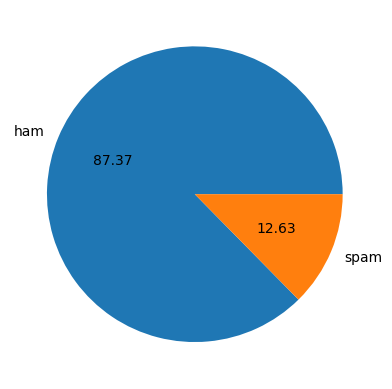

In [40]:
#checking the dataset wether it is balanced or not 
df['target'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

The data set id imblanced 

In [41]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer









[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 
1. Punkt is a tokenizer in the Natural Language Toolkit (NLTK) that is specifically designed for English text. It uses a statistical model to identify sentence boundaries based on a set of rules and patterns.



2. Stop words Stop words are common words in a language (e.g., "is," "the," "and") that carry little meaning and are often removed during text preprocessing in natural language processing (NLP) tasks. This helps focus on more meaningful words and reduces noise in data. Popular libraries like NLTK and SpaCy provide predefined lists of stop words for easy filtering

In [42]:
# for the purpose of data exploration, creating new features
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


C:\Users\sonam\AppData\Local\Temp\ipykernel_12668\3252039902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\sonam\AppData\Local\Temp\ipykernel_12668\3252039902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\sonam\AppData\Local\Temp\ipykernel_12668\3252039902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


1. No_of_Characters: Number of characters in the text message
2. No_of_Words: Number of words in the text message
3. No_of_sentence: Number of sentences in the text message

In [43]:
# checking the quick statistical summary of the newly created features
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


here we can see that  there are 18 words on average in each message and every message consist of 2 sentences approximately

In [44]:
# checking the quick statistical summary of the newly created features for HAM messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


This shows that there are 17 words on average in each ham message, and every message consist of nearly 2 sentences approximately

In [45]:

# checking the quick statistical summary of the newly created features for SPAM messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


This shows that there are 27 words on average in each spam message, and every message consist of nearly 3 sentences approximately. It means spam messages are greater in length than ham messages

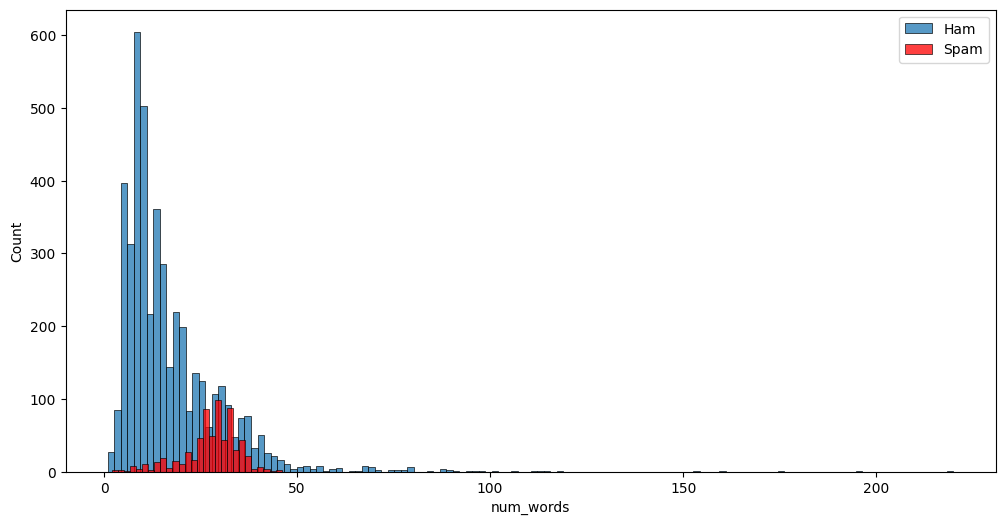

In [46]:
# now displaying the word count for HAM & SPAM messages with the help of histogram plot
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Spam')
plt.legend()

# Data preprossing 

Using nltk for preprossing of data 

1. Tokenization: Breaking text into words or sentences.
2. Stemming: Reducing words to their root form (e.g., "running" -> "run").
3. Lemmatization: Reducing words to their dictionary form (e.g., "better" -> "good").
4. Part-of-speech tagging: Identifying the grammatical category of words (e.g., noun, verb, adjective).
5. Named entity recognition: Identifying named entities like people, organizations, and locations.
6. Sentiment analysis: Determining the sentiment expressed in text (positive, negative, neutral).
7. Parsing: Analyzing the grammatical structure of sentences.

In [47]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing stopwords for stopwords removal i.e. (like "the", "and", "in").
from nltk.corpus import stopwords

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Defining a text preprocessing function
def transform_text(text):
    
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum(): # is alphanumeric?
            y.append(i)
    text = y[:]
    y.clear()
    
    # Removing stop words and punctuation
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    # Stemming using Porter Stemmer
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [48]:
# Checking this function with sample text
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [49]:
# Applying text transformation and creating a new column "cleaned_text"
df['cleaned_text'] = df['text'].apply(transform_text)
df.head()

C:\Users\sonam\AppData\Local\Temp\ipykernel_12668\757486267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# frequent words 
Now lets  display the top 30 words used in each category (ham or spam) of messages.

In [51]:
# Create an empty list to store spam corpus
spam_corpus = []

# Iterate through each spam message in the DataFrame
for msg in df[df['target'] == 1]['cleaned_text'].tolist():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the spam corpus list
        spam_corpus.append(word)

# Calculate the length of the spam corpus (number of words)
length_of_spam_corpus = len(spam_corpus)

print("Length of spam corpus:", length_of_spam_corpus)

Length of spam corpus: 9939


In [52]:
from collections import Counter
# Get the 30 most common words in spam messages and thier count
most_common_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_spam

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


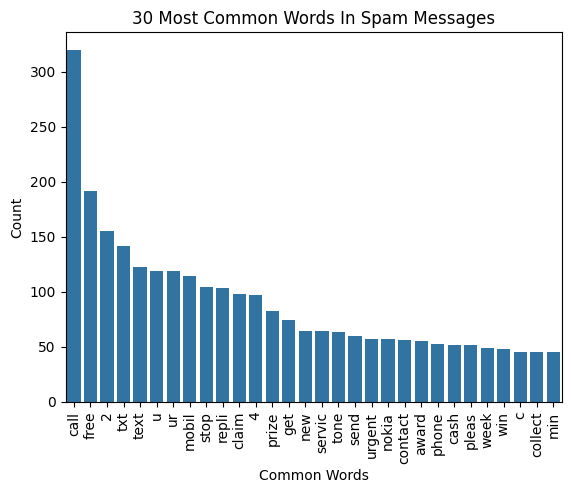

In [53]:
# Display the 30 most common words in spam messages and thier count using bar chart
sns.barplot(data=df, x=most_common_spam[0],y=most_common_spam[1])
plt.xticks(rotation='vertical')
plt.title("30 Most Common Words In Spam Messages")
plt.xlabel("Common Words")
plt.ylabel("Count")
plt.show()

For ham msg 

In [54]:
# Create an empty list to store ham corpus
ham_corpus = []

# Iterate through each ham message in the DataFrame
for msg in df[df['target'] == 0]['cleaned_text'].tolist():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the ham corpus list
        ham_corpus.append(word)

# Calculate the length of the ham corpus (number of words)
length_of_ham_corpus = len(ham_corpus)

print("Length of ham corpus:", length_of_ham_corpus)

Length of ham corpus: 35404


In [55]:
# Get the 30 most common words in ham messages and thier count
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_ham

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# feature engineering 
1.  TF-IDF Vectorization

TF-IDF provides a valuable way to represent text data into numeric data and extract meaningful features, making it a fundamental technique in natural language processing. In the realm of NLP, transforming text into numerical representations is essential for various tasks. TF-IDF vectorization stands out as a powerful technique for this purpose. TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a method to represent text documents as numerical vectors. It measures the importance of a term within a document relative to the entire corpus

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_features=3000)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['cleaned_text']).toarray()

In [60]:
y = df['target'].values

# Model training 

In [61]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [62]:
# Importing Models

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


In [63]:
# Loading Models
svc = SVC(kernel='sigmoid', gamma=1.0)

mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)



In [65]:
# Creating a dictionary of models
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'RF': rfc, 
}

In [66]:
from sklearn.metrics import accuracy_score, precision_score

# defining a function to train a model, predict the outputs and calculate accuracy and precision scores
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
# checking the defined function using SVC classifier
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, np.float64(0.9741379310344828))

# Model  EVALUATION

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores}
                             ).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.959381,1.000000
3,RF,0.971954,1.000000
0,SVC,0.972921,0.974138
2,DT,0.935203,0.838095


In [70]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.959381
1,RF,Accuracy,0.971954
2,SVC,Accuracy,0.972921
3,DT,Accuracy,0.935203
4,NB,Precision,1.000000
5,RF,Precision,1.000000
6,SVC,Precision,0.974138
7,DT,Precision,0.838095


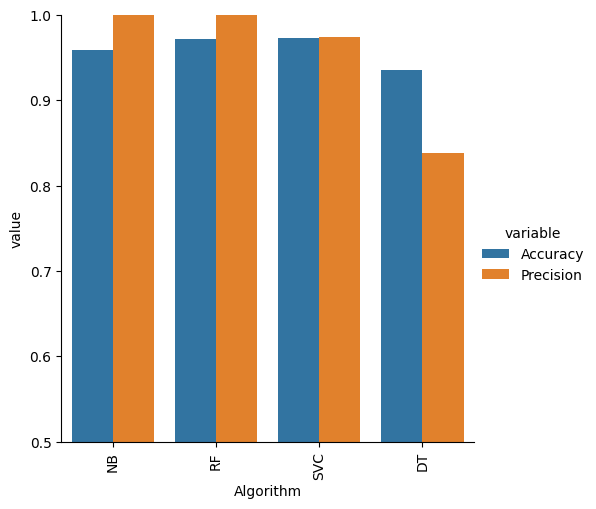

In [71]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Key Observations:

1.  NB:  NB (Naive Bayes) achieved perfect precision (1.0), indicating that they never misclassified positive instances.
2. RF, and SVC: Random Forest (RF), and Support Vector Classifier (SVC) also performed well, with high accuracy and precision scores.
3. Decision Tree (DT): DT had the lowest accuracy and precision scores among the models, suggesting that it might be overfitting the training data or struggling to capture complex relationships.

#  Ensemble Methods
 
 Voting classifiers and stacking classifiers are ensemble methods that combine the predictions of multiple base models to improve overall performance

In [73]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier()

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9913793103448276


Accuracy: 0.9767

This indicates that our voting classifier correctly predicted 97.67% of the instances in our test dataset. It's a very high accuracy, suggesting that our model is performing well overall.
Precision: 1.0

The  precision score is 0.991 nearly equal to 1, meaning that almost  positive prediction made by our model was indeed correct. In other words, there were very few false positives. This is an excellent result, especially when dealing with imbalanced datasets.
Overall:

Our voting classifier has achieved excellent performance based on the provided accuracy and precision scores. This suggests that the combination of SVM, MNB, ETC, and RF models is effective in our classification task

In [74]:
from sklearn.ensemble import StackingClassifier
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ]
final_estimator=RandomForestClassifier()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9318181818181818




 stacking classifier has achieved excellent overall performance, with a very high accuracy and a respectable precision score. The combination of SVM, MNB, ETC, and the RF meta-learner seems to be working effectively

#  Conclusion
Based on the individual results NB, and RF appear to be the top-performing models in terms of both accuracy and precision.

 voting classifier achieved excellent performance based on the provided accuracy and precision scores. This suggests that the combination of SVM, MNB,  and RF models is effective in our classification task.

 stacking classifier achieved excellent overall performance, with a very high accuracy and a respectable precision score. The combination of SVM, MNB, and the RF meta-learner seems to be working effectively.

 When selecting the optimal model, it is important to consider factors beyond accuracy, such as computational efficiency and the application's specific requirements. Further fine-tuning and validation are recommended before finalizing the choice.